Let's implement Kmeans clustering algorithm and apply it to compress an image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

Kmeans on fake data

In [2]:
data = sio.loadmat('./data/ex7data2.mat')

In [3]:
X = data['X']

In [4]:
def init_centroids(X, k):
    idx = np.random.randint(X.shape[0], size=k)
    return X[idx,:]

In [5]:
def find_closest_centroid(X, centroids):
    c = np.empty(X.shape[0])
    for idx, x in enumerate(X):
        dist = np.empty(centroids.shape[0])
        for i, centroid in enumerate(centroids): 
            dist[i] = np.linalg.norm(x-centroid)
        c[idx] = np.argmin(dist)
    return c

In [6]:
def compute_new_centroids(X, c, k):
    centroids = np.empty((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[np.where(c == i)].mean(axis=0)
    return centroids

In [7]:
def kmeans(X,k):
    centroids = init_centroids(X, k)
    for x in range(10):
        c = find_closest_centroid(X, centroids)
        centroids = compute_new_centroids(X, c, k)
    return c, centroids

In [8]:
c, centroids = kmeans(X,3)

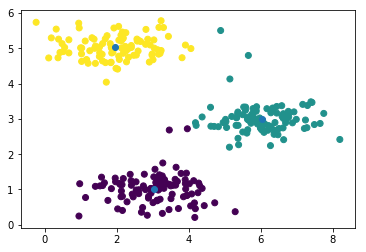

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=c)
ax.scatter(centroids[:,0],centroids[:,1])
plt.show()

Kmeans on image

In [10]:
data = sio.loadmat('./data/bird_small.mat')

In [11]:
A = data['A']
print(A.shape)
print(A[1,1])

(128, 128, 3)
[224 192 120]


In [12]:
A = A.reshape((-1,3))

In [13]:
def show_image(A):
    A= A.reshape((128,128,3))
    plt.imshow(A)
    plt.show()

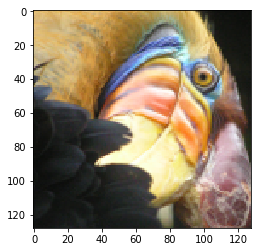

In [14]:
show_image(A)

In [15]:
c, centroids = kmeans(A, 16)

In [16]:
reconstructed = np.empty(A.shape)
for idx, i in enumerate(c):
    reconstructed[idx] = centroids[int(i)]

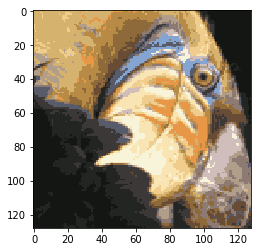

In [17]:
show_image(reconstructed.astype(int))